# LCT GPT Prompt Experimentation

## Installation

Clone the github repository and install the requirements

In [ ]:
# It is recommended to setup a Python or conda virtual environment before running this notebook
# A conda/mamba environment file is provided in the repository

# Alternatively if libraries not installed yet, uncomment and run the following:
#!pip install -r ../requirements.txt

In [1]:
# import libraries
import os
import sys
import json
import random
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
#from itables import init_notebook_mode

# Add local libraries in tools/
sys.path.insert(1, '../tools')
import experiment as ex
from load_schema_json import load_json, validate_json, json_to_dataframe
from utils_llm import LLM, openai_apikey_input
from excel_json_converter import excel_to_json

# open notebook in interactive mode
#init_notebook_mode(all_interactive=True)

## Schema and data

Define locations of files for sequencing types, instruction prompts, and examples.

In [2]:
# output path:
outpath = "../results/"

# root path:
path_schema = "../schemas/"

# filename for examples (either .json or .xlsx):
filename_examples = "sequencing_examples_reason.xlsx"
#filename_examples = "sequencing_examples_reason.json"

# filename for sequencing definitions (either .json or .xlsx):
filename_definitions = "sequencing_types.xlsx"
#filename_definitions = "sequencing_types.json"

# filename for instructions
filename_zero_prompt = "instruction_prompt.txt"

# filename for json schema
filename_schema = "schema_sequencing_examples_reason.json"

# if you want to select manually examples from the example table (filename_examples ), select indices here as list
# Preferentially you want to select one example per sequencing type
# Note that indices count start with 0
# Alternatively set None or empty list. In this case a random selection of examples will be used

list_prompt_indices = [0,1,6,16,25,28,32,35]
#list_prompt_indices = None


### Pre-process: convert any excel files to json beforehand

In [3]:
# Check if filename_examples is excel file
if filename_examples.endswith(".xlsx"):
    # convert filename_examples to json
    json_filename_out = filename_examples.replace(".xlsx", "_converted.json")
    excel_to_json(os.path.join(path_schema, filename_examples), 
                  os.path.join(path_schema, json_filename_out))
    filename_examples = json_filename_out

# Check if filename_definitions is excel file
if filename_definitions.endswith(".xlsx"):
    # convert filename_definitions to json
    json_filename_out = filename_definitions.replace(".xlsx", "_converted.json")
    excel_to_json(os.path.join(path_schema, filename_definitions), 
                  os.path.join(path_schema, json_filename_out))
    filename_definitions = json_filename_out

## OpenAI Authentication

In [2]:
# Authentication with OpenAI API key for GPT usage
# initialize token_counter
token_count = 0

# set modelname
modelname_llm = 'gpt-3.5-turbo-instruct'

# set openAI authentication
openai_apikey_input()

Row
    [0] PasswordInput(name='Enter your OpenAI A..., placeholder='<OpenAI API Key>')
    [1] Markdown(str)

## Run Experiment pipeline

This experiment pipeline includes the following main steps:
- load examples from json file
- split examples in train and test samples
- generate prompt string
- call OpenAI API
- save prompt and response to file
- save results to csv file
- evaluate results

In [5]:
df_results, outpath_exp, seq_classes = ex.run_pipe(
        outpath = outpath, 
        path_schema = path_schema, 
        filename_examples = filename_examples, 
        filename_schema = filename_schema, 
        filename_definitions = filename_definitions, 
        filename_zero_prompt = filename_zero_prompt, 
        modelname_llm = modelname_llm,
        list_prompt_indices = list_prompt_indices)

LLM initialized with API key from file: ../../openai_key.txt
Test sample 0 of 28
Test class: Consequential Sequencing | Prediction: REI | Probability: 0.342 | Used tokens: 2507 
Test sample 1 of 28
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.517 | Used tokens: 2509 
Test sample 2 of 28
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.428 | Used tokens: 2513 
Test sample 3 of 28
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.938 | Used tokens: 2540 
Test sample 4 of 28
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.667 | Used tokens: 2548 
Test sample 5 of 28
Test class: Consequential Sequencing | Prediction: COH | Probability: 0.418 | Used tokens: 2488 
Test sample 6 of 28
Test class: Consequential Sequencing | Prediction: CON | Probability: 0.971 | Used tokens: 2556 
Test sample 7 of 28
Test class: Sequential Sequencing | Prediction: SEQ | Probability: 0.487 | Used tokens: 2512 
Test s

### Show results table for all samples

In [2]:
# show results table interactively
df_results

NameError: name 'df_results' is not defined

### Evaluate and print results stats

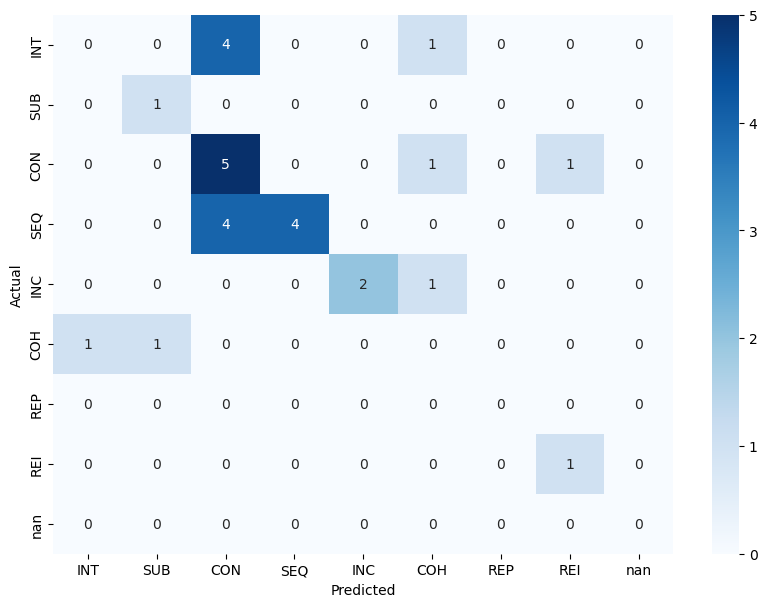

------ Experiment Results ------
accuracy: {'INT': 0.0, 'SUB': 1.0, 'CON': 0.7142857142857143, 'SEQ': 0.5, 'INC': 0.6666666666666666, 'COH': 0.0, 'REP': nan, 'REI': 1.0}
recall: {'INT': 0.0, 'SUB': 1.0, 'CON': 0.7142857142857143, 'SEQ': 0.5, 'INC': 0.6666666666666666, 'COH': 0.0, 'REP': nan, 'REI': 1.0}
precision: {'INT': 0.0, 'SUB': 0.5, 'CON': 0.38461538461538464, 'SEQ': 1.0, 'INC': 1.0, 'COH': 0.0, 'REP': nan, 'REI': 0.5}
mean_accuracy: 0.5544
mean_recall: 0.5544
mean_precision: 0.4835
--------------------------------


In [7]:
ex.eval_exp(df_results, outpath_exp, seq_classes)